In [1]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
train = pd.read_csv('BMI_Dataset_train.csv') # uses pandas library to open a .csv file
test = pd.read_csv('BMI_Dataset_test.csv')

In [2]:
test.head()

,ID,Height(meter),Weight(KG)
0,1,1.771304,59.242109
1,2,1.745401,59.732606
2,3,1.622663,49.255217
3,4,1.737576,51.955354
4,5,1.725486,60.547349


In [3]:
x= train.drop(['BMI','ID'],axis=1)
label=train['BMI']

In [4]:
x=np.array(x)
y=np.array(label)


In [5]:
x.shape

(1000, 2)

In [6]:
x

array([[ 1.67089607, 51.24119481],
       [ 1.81648633, 61.89589865],
       [ 1.762728  , 69.39647493],
       ...,
       [ 1.77930708, 61.06972693],
       [ 1.70954624, 55.33654501],
       [ 1.6865125 , 58.2057889 ]])

In [7]:
y.shape

(1000,)

In [8]:
y

array([18.35356231, 18.7584782 , 22.33401515, 21.49982789, 22.07275754,
       18.36485748, 20.41296726, 19.56753733, 17.13120924, 19.01813419,
       17.54520204, 18.9258715 , 19.10924187, 17.50255542, 19.47089433,
       20.60847878, 21.32481594, 19.10488481, 19.34784271, 21.58205872,
       21.26676576, 17.07669376, 19.44424753, 21.80109169, 20.18708692,
       19.94793445, 20.29826882, 17.20177106, 18.69375688, 15.02271709,
       19.59639877, 19.22539616, 19.21332561, 19.10018371, 18.89539265,
       22.33447848, 18.61524935, 20.0805596 , 18.28682104, 18.5889674 ,
       20.65599464, 20.23321995, 20.90223215, 17.18744208, 19.19246377,
       22.89334232, 17.91658686, 19.8706185 , 21.14200216, 19.58677024,
       17.86314148, 17.03208244, 20.30458172, 21.10408812, 22.10666605,
       20.33055223, 19.05154888, 20.6216217 , 20.45938215, 20.30743432,
       19.5504978 , 20.16446428, 18.97203044, 16.555425  , 20.99802326,
       20.3403347 , 16.10707683, 21.33610393, 18.77035638, 20.18

In [9]:
w=np.ones((1,x.shape[1]))
print(w)

[[1. 1.]]


In [10]:
w.shape

(1, 2)

In [11]:
def hypo(w,x,b):#prediction
    pred=np.dot(w,x.T)+b
    return pred

In [12]:
def error(pred,y,m):#cost #error
    er=(1/(2*m))*np.sum(np.square(pred-y.T))
    return er

In [13]:
def gradient(pred,y,m,alpha,w,b):#gradient decent
    dw=(1/m)*np.dot((pred-y.T),x)
    db=(1/m)*np.sum(pred-y.T)
    w=w-alpha*(dw)
    b=b-alpha*db
    return b,w

In [14]:
#Main
alpha=0.0005 #larning rate between 0 and 1 
cost=[]
b=1 #intercept
m=x.shape[0]
for i in range(2000000):
    pred=hypo(w,x,b) #predicton
    er=error(pred,y,m)
    b,w=gradient(pred,y,m,alpha,w,b)
    if i%100000==0:
        print(er)
        cost.append(er)

857.2622976797845
0.5187223726857476
0.4908370683200072
0.4646848225236748
0.43995112673648856
0.41654617827189
0.39439780122744156
0.3734384835959278
0.35360438643546943
0.3348351010525112
0.31707346203443443
0.3002653729577885
0.2843596416161203
0.2693078241037484
0.2550640772706655
0.24158501909857194
0.2288295965727666
0.21675896064742006
0.20533634792350566
0.19452696867890312


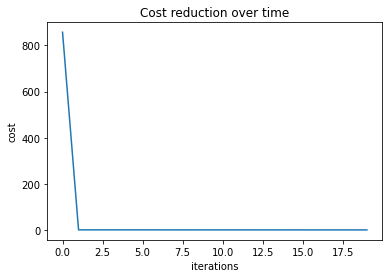

In [15]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost reduction over time')
plt.show()

In [16]:
print(w)
print(b)

[[-8.67212957  0.29689954]]
17.160856283328087


In [ ]:
##try comparing true label and predicted one

In [20]:
p=hypo(w,x,b)
print(p)

[[17.8841161  19.78491515 22.47803206 21.29890421 21.65748104 18.63026756
  20.83648286 20.11206518 17.33377995 18.69738689 17.63371617 19.02814746
  18.86539971 17.75083213 20.35084343 19.95774522 21.28948694 20.03821101
  19.07533039 21.24122011 21.31511935 16.35939704 19.52587414 21.363206
  19.82296489 20.73238669 20.00586172 17.09131468 18.08065886 15.75550274
  18.92249882 19.15919208 19.95194763 20.20773929 19.25160381 21.53796317
  18.58033507 19.90973779 17.42125651 18.79977727 19.61395968 20.62264766
  20.68521276 16.95969104 19.37119636 22.0439464  17.9774195  20.11018362
  21.55583804 19.33860248 18.57781953 17.51845715 19.38546199 21.61366748
  22.64278699 19.74723389 18.6148567  20.3013742  19.8445868  20.48148901
  19.58663387 19.74492678 19.7835136  16.89223917 21.13122349 20.11513383
  16.29422255 20.19462319 19.60049497 20.66171645 16.84652612 19.43266585
  18.74150264 20.76425605 20.63971506 17.37130493 18.73963312 20.1676845
  18.86281225 22.65063461 19.92248269 19.

In [21]:
print(y)

[18.35356231 18.7584782  22.33401515 21.49982789 22.07275754 18.36485748
 20.41296726 19.56753733 17.13120924 19.01813419 17.54520204 18.9258715
 19.10924187 17.50255542 19.47089433 20.60847878 21.32481594 19.10488481
 19.34784271 21.58205872 21.26676576 17.07669376 19.44424753 21.80109169
 20.18708692 19.94793445 20.29826882 17.20177106 18.69375688 15.02271709
 19.59639877 19.22539616 19.21332561 19.10018371 18.89539265 22.33447848
 18.61524935 20.0805596  18.28682104 18.5889674  20.65599464 20.23321995
 20.90223215 17.18744208 19.19246377 22.89334232 17.91658686 19.8706185
 21.14200216 19.58677024 17.86314148 17.03208244 20.30458172 21.10408812
 22.10666605 20.33055223 19.05154888 20.6216217  20.45938215 20.30743432
 19.5504978  20.16446428 18.97203044 16.555425   20.99802326 20.3403347
 16.10707683 21.33610393 18.77035638 20.18375519 17.49134453 19.39694896
 19.20392677 20.8467164  21.79909638 16.72012051 18.77666295 20.08547561
 19.21124053 22.25633163 20.6324521  18.94941343 20.51

In [22]:
#Getting label of the target ,test values
t=test.drop(['ID'],axis=1)
t=np.array(t)
print(t.shape)

In [27]:
testpred=hypo(w,t,b)#apply prediction function again

In [57]:
testpred.shape

(1000,)

In [58]:
ts=np.array(test['ID'])
print(ts.shape)

(1000,)


In [59]:
e=pd.DataFrame({'ID':ts,'BMI':testpred})
e.to_csv('BMIvectorized.CSV',encoding='utf-8',index=False)

In [ ]:
"""#Main #optimal code
alpha=0.0005
cost=[]
b=1
m=x.shape[0]
for i in range(200000):
    pred=np.dot(w,x.T)+b #predicton
    er=(1/(2*m))*np.sum(np.square(pred-y.T))
    dw=(1/m)*np.dot((pred-y.T),x)
    db=(1/m)*np.sum(pred-y.T)
    w=w-alpha*(dw)
    b=b-alpha*db
    if i%100000==0:
        print(er)
        cost.append(er)"""